# K-nearest Neighbour (KNN)

KNN is a `supervised machine learning` algorithm that can be used to solve both `classification and regression` problems. 

It is a `non-parametric`, lazy learning algorithm. `Non-parametric means that it does not make any assumptions on the underlying data distribution`. Lazy learning means that it does not require any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

#### Regression using KNN

In [1]:
# Example of KNN classfier on IRIS data using SNS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Reggression problem on tips dataset

# load the dataset
df = sns.load_dataset('diamonds')
df.head()
# df.shape


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
print("=== QUICK DATA CHECK ===")
print(f"Dataset shape       : {df.shape}")
print(f"Data types         :\n{df.dtypes}")
print(f"Statistical summary:\n{df.describe(include='all')}")
print(f"Missing values      : {df.isnull().sum().sum()}")
print(f"Duplicate rows      : {df.duplicated().sum()}")
print("\nColumns:")
print(df.columns.tolist())
print("\nSample rows:")
df.head()

=== QUICK DATA CHECK ===
Dataset shape       : (53940, 10)
Data types         :
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
Statistical summary:
               carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.70000

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


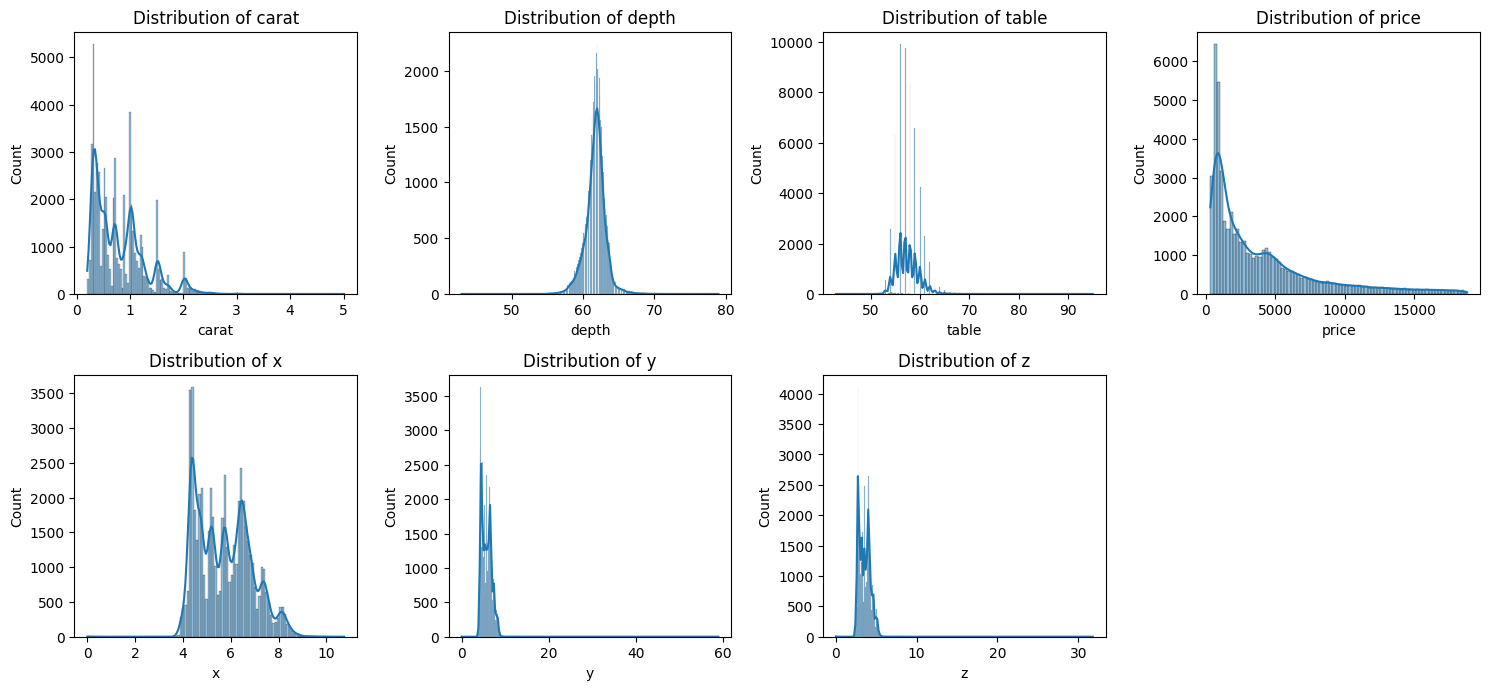

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
		plt.subplot(3, 4, i + 1)
		sns.histplot(df[feature], kde=True)
		plt.title(f'Distribution of {feature}')	
plt.tight_layout()
plt.show()


<Axes: xlabel='price', ylabel='Count'>

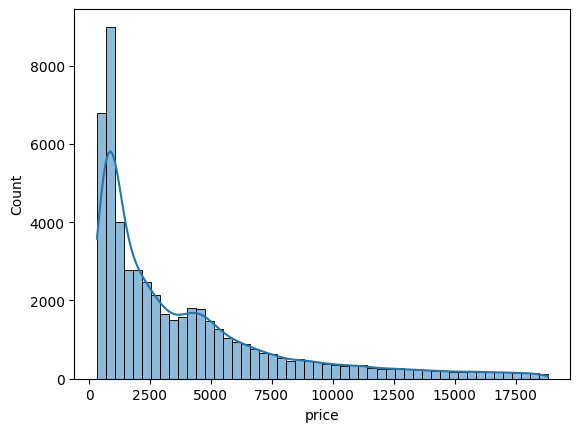

In [12]:
sns.histplot(data= df, x = 'price', kde=True, bins=50)

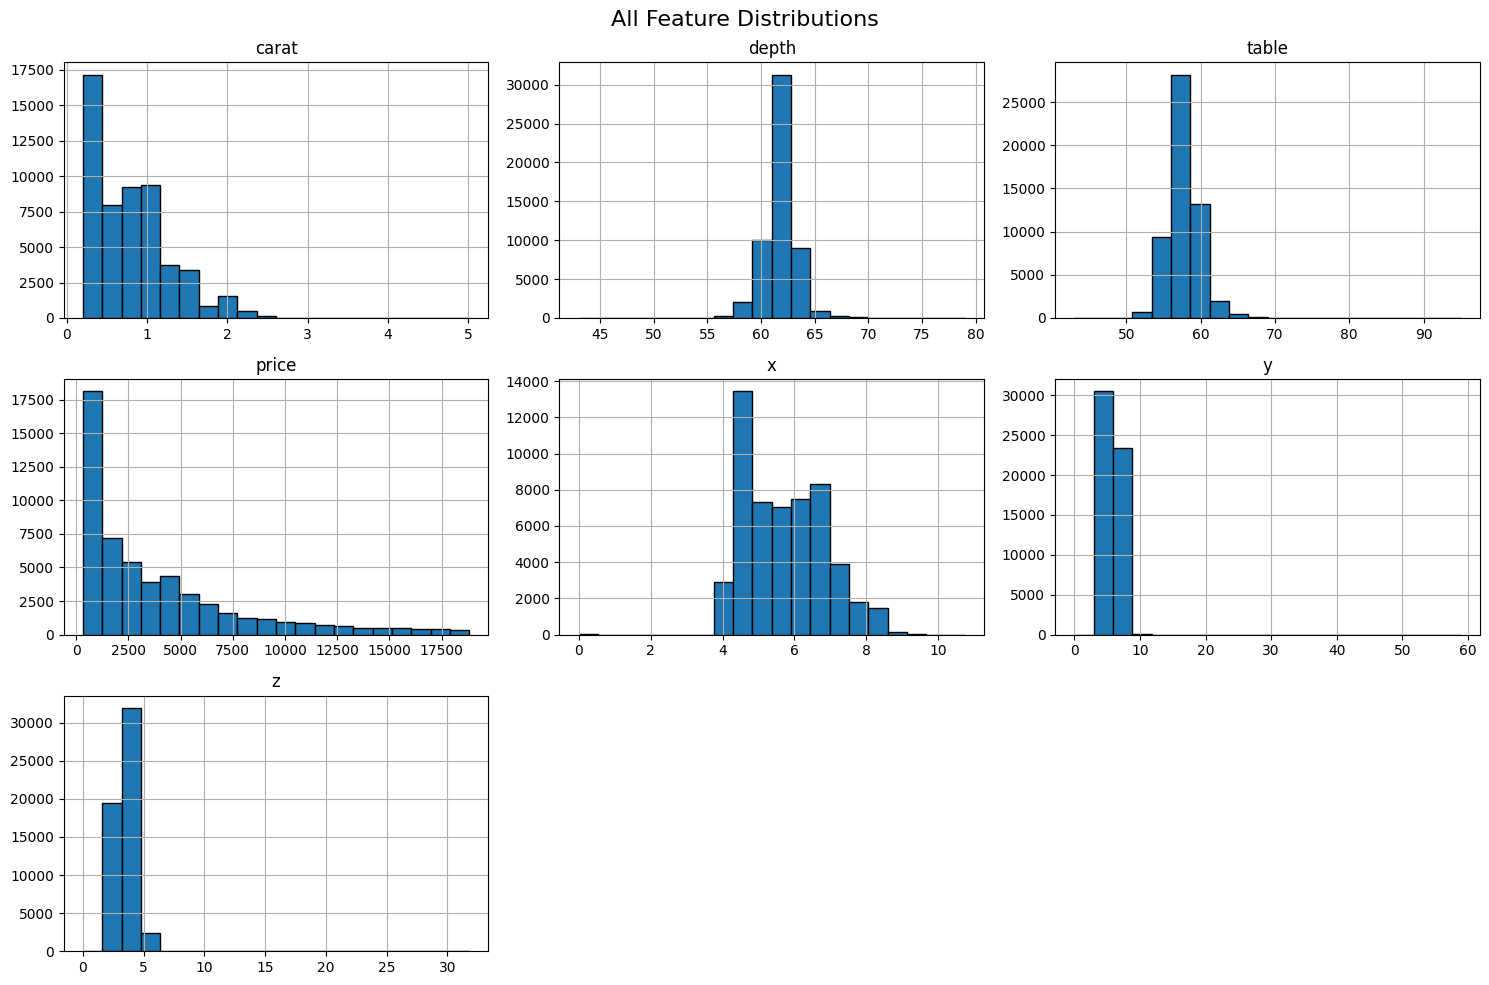

In [13]:
# View all feature distributions in one command
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('All Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
preprocessor = ColumnTransformer(
		transformers=[
				('num', StandardScaler(), num_features),
				('cat', OneHotEncoder(drop='first'), cat_features)
		])

In [24]:
from sklearn.neighbors import KNeighborsRegressor

model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2))
    ]
)
X = df.drop('price', axis=1)
y = df['price']	
model.fit(X, y)
y_pred = model.predict(X)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error  : {mse:.2f}")
print(f"R^2 Score           : {r2:.2f}")

Mean Absolute Error : 324.15
Mean Squared Error  : 420850.62
R^2 Score           : 0.97


In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )
 
# Fit the model on the training data
model.fit(X_train, y_train)
 
# Predict on the test data
y_pred_test = model.predict(X_test)
 
# Evaluate the model on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
 
print("=== Test Set Evaluation ===")
print(f"Mean Absolute Error : {mae_test:.2f}")
print(f"Mean Squared Error  : {mse_test:.2f}")
print(f"R^2 Score           : {r2_test:.2f}")
 
# Perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__metric': ['minkowski', 'euclidean', 'manhattan'],
    'model__p': [1, 2]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
 
print("\n=== Best Parameters from GridSearch ===")
print(grid_search.best_params_)
print(f"Best Cross-Validated R^2: {grid_search.best_score_:.2f}")

=== Test Set Evaluation ===
Mean Absolute Error : 416.43
Mean Squared Error  : 683897.63
R^2 Score           : 0.96

=== Best Parameters from GridSearch ===
{'model__metric': 'minkowski', 'model__n_neighbors': 5, 'model__p': 1}
Best Cross-Validated R^2: 0.96


In [28]:
# Example input data (replace with your actual data)
new_data = pd.DataFrame({
    'carat': [0.5, 1.2],
    'cut': ['Ideal', 'Premium'],
    'color': ['E', 'G'],
    'clarity': ['VS1', 'SI2'],
    'depth': [61.5, 62.0],
    'table': [55.0, 58.0],
    'x': [5.1, 6.5],
    'y': [5.2, 6.6],
    'z': [3.2, 4.0]
})

predicted_prices = model.predict(new_data)
# Display the predictions
print("Predicted Prices:", predicted_prices)


Predicted Prices: [1766.6 4306.8]
